<h1 align="center">
  Harnessing Machine Learning for Enhanced Customer Retention​
</h1>


<h2 align="center">
  Logisitc Regression​
  
  Team Telecoms
</h2>


### First we need to import the required Libaries 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Load the dataset

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Drop missing cells

In [4]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [5]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# First, attempt to convert 'TotalCharges' to numeric, errors='coerce' will set invalid parsing as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop 'customerID' as before
df = df.drop('customerID', axis=1)

mappings = {}

for col in df.columns:
    # Check if the column is not numeric before encoding
    if df[col].dtype == 'object' and not pd.to_numeric(df[col], errors='coerce').notnull().all():
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings
for col, mapping in mappings.items():
    print(f"Mapping for {col}: {mapping}")

df.head()


Mapping for gender: {'Female': 0, 'Male': 1}
Mapping for SeniorCitizen: {'No': 0, 'Yes': 1}
Mapping for Partner: {'No': 0, 'Yes': 1}
Mapping for Dependents: {'No': 0, 'Yes': 1}
Mapping for PhoneService: {'No': 0, 'Yes': 1}
Mapping for MultipleLines: {'No': 0, 'No phone service': 1, 'Yes': 2}
Mapping for InternetService: {'DSL': 0, 'Fiber optic': 1, 'No': 2}
Mapping for OnlineSecurity: {'No': 0, 'No internet service': 1, 'Yes': 2}
Mapping for OnlineBackup: {'No': 0, 'No internet service': 1, 'Yes': 2}
Mapping for DeviceProtection: {'No': 0, 'No internet service': 1, 'Yes': 2}
Mapping for TechSupport: {'No': 0, 'No internet service': 1, 'Yes': 2}
Mapping for StreamingTV: {'No': 0, 'No internet service': 1, 'Yes': 2}
Mapping for StreamingMovies: {'No': 0, 'No internet service': 1, 'Yes': 2}
Mapping for Contract: {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
Mapping for PaperlessBilling: {'No': 0, 'Yes': 1}
Mapping for PaymentMethod: {'Bank transfer (automatic)': 0, 'Credit card (aut

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [8]:
# Assuming 'df' is your DataFrame and contains the feature matrix and response variable
X = df.drop('Churn', axis=1)  # Feature matrix
y = df['Churn']  # Response variable
selected_features = []  # To keep track of selected features
remaining_features = list(X.columns)  # Initially, all features are remaining

while len(remaining_features) > 0:
    p_values = []
    for feature in remaining_features:
        # Test the feature by including it in the model and checking its p-value
        model = sm.Logit(y, sm.add_constant(X[selected_features + [feature]])).fit(disp=0)
        p_values.append((feature, model.pvalues[feature]))
    
    # Select the feature with the smallest p-value
    p_values.sort(key=lambda x: x[1])
    best_feature, best_p_value = p_values[0]
    
    # If the best p-value is significant, add it to the model, else break the loop
    if best_p_value < 0.05:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break

# Updating the feature matrix 'X' to include only the selected features
X = df[selected_features]

# Displaying the selected features
print("Selected features:", selected_features)

Selected features: ['Contract', 'MonthlyCharges', 'tenure', 'OnlineSecurity', 'PhoneService', 'TechSupport', 'PaperlessBilling', 'TotalCharges', 'OnlineBackup', 'InternetService', 'SeniorCitizen', 'DeviceProtection']


In [25]:
X.head()

,Contract,MonthlyCharges,tenure,OnlineSecurity,PhoneService,TechSupport,PaperlessBilling,TotalCharges,OnlineBackup,InternetService,SeniorCitizen,DeviceProtection
0,0,29.85,1,0,0,0,1,29.85,2,0,0,0
1,1,56.95,34,2,1,0,0,1889.50,0,0,0,2
2,0,53.85,2,2,1,0,1,108.15,2,0,0,0
3,1,42.30,45,2,0,2,0,1840.75,0,0,0,2
4,0,70.70,2,0,1,0,1,151.65,0,1,0,0


In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify=y)

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8001624695369618


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1808
           1       0.64      0.57      0.60       654

    accuracy                           0.80      2462
   macro avg       0.74      0.73      0.73      2462
weighted avg       0.79      0.80      0.80      2462



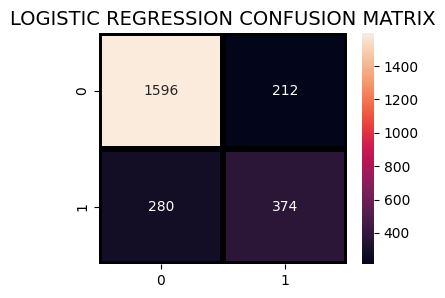

In [12]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [45]:
feature_names = ['Contract', 'MonthlyCharges', 'tenure', 'OnlineSecurity', 'PhoneService', 'TechSupport', 'PaperlessBilling', 'TotalCharges', 'OnlineBackup', 'InternetService', 'SeniorCitizen', 'DeviceProtection']


def create_sample_customer(InternetService, Contract,
                           OnlineSecurity, TechSupport, OnlineBackup,
                           DeviceProtection,PaperlessBilling, PhoneService, 
                           SeniorCitizen, MonthlyCharges, TotalCharges,
                           tenure):
    # Updated mappings to include 'No internet service' and remove 'PaymentMethod'
    mappings = {
        'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
        'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
        'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
        'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
        'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
        'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
        'PaperlessBilling': {'No': 0, 'Yes': 1},
        'PhoneService': {'No': 0, 'Yes': 1}
    }
    
    # Convert categorical and binary features to numerical
    sample_data = [
        mappings['Contract'].get(Contract, -1),
        MonthlyCharges,
        tenure,
        mappings['OnlineSecurity'].get(OnlineSecurity, -1),
        mappings['PhoneService'].get(PhoneService, -1),
        mappings['TechSupport'].get(TechSupport, -1),
        mappings['PaperlessBilling'].get(PaperlessBilling, -1),
        TotalCharges,
        mappings['OnlineBackup'].get(OnlineBackup, -1),
        mappings['InternetService'].get(InternetService, -1),
        SeniorCitizen,
        mappings['DeviceProtection'].get(DeviceProtection, -1),
    ]
    return sample_data

# Sample usage:
sample_customer = create_sample_customer(
    InternetService='Fiber optic', 
    Contract='Month-to-month',
    OnlineSecurity='No',
    TechSupport='Yes', 
    OnlineBackup='Yes', 
    DeviceProtection='Yes', 
    PaperlessBilling='Yes',
    PhoneService='No',
    SeniorCitizen=0,
    MonthlyCharges=70, 
    TotalCharges=700, 
    tenure=10
)
# Convert the sample data to a DataFrame with correct column names
sample_customer_df = pd.DataFrame([sample_customer], columns=feature_names)

In [46]:
# Assuming lr_model is your trained Logistic Regression model
churn_prediction = lr_model.predict(sample_customer_df)

# Interpreting the prediction
prediction_text = "will churn" if churn_prediction[0] == 1 else "will not churn"
print(f"The customer {prediction_text}.")

# Function to generate recommendations
def generate_recommendations(customer_features):
    recommendations = []
    # Example conditions for recommendations
    if customer_features[9] == 0:  # Assuming 1 is 'Fiber optic'
        recommendations.append("Consider offering a promotional deal on fiber optic services.")
    if customer_features[0] == 0:  # Assuming 0 is 'Month-to-month'
        recommendations.append("Recommend switching to a longer-term contract for better stability.")
    if customer_features[8] == 0:  # Assuming this is 'OnlineBackup'
        recommendations.append("Offer a discount on Online Backup services to enhance value.")
    if customer_features[11] == 0:  # No Device Protection
        recommendations.append("Suggest adding device protection to their plan for peace of mind.")
    if customer_features[5] == 0:  # No Tech Support
        recommendations.append("Advise the importance of tech support for uninterrupted service.")
    if customer_features[2] <= 12:  # Less than 1 year
        recommendations.append("Extend a loyalty program invitation after the first year.")
    if customer_features[1] > 75:  # High Monthly Charges
        recommendations.append("Review the customer's plan to offer a competitive rate.")    
    
    return recommendations if recommendations else ["Customer Was Retained Amazing!!!!!"]

# Generate recommendations if the customer is predicted to churn
if churn_prediction[0] == 1:
    recommendations = generate_recommendations(sample_customer)
    print("Recommendations to prevent churn:")
    for recommendation in recommendations:
        print(f"- {recommendation}")

The customer will churn.
Recommendations to prevent churn:
- Recommend switching to a longer-term contract for better stability.
- Extend a loyalty program invitation after the first year.
